In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import h5py
import glob
import tensorflow.keras.optimizers
import os
import sklearn
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
import cv2
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16

In [ ]:
dict_characters = {0: 'abraham_grampa_simpson' ,1: 'agnes_skinner' ,2: 'apu_nahasapeemapetilon',
          3: 'barney_gumble' ,4: 'bart_simpson' ,5: 'brandine_spuckler',
          6: 'carl_carlson' ,7: 'charles_montgomery_burns' ,8: 'chief_wiggum',
          9: 'cletus_spuckler' ,10: 'comic_book_guy' ,11: 'disco_stu',
          12: 'dolph_starbeam' ,13: 'duff_man' ,14: 'edna_krabappel',
          15: 'fat_tony' ,16: 'gary_chalmers' ,17: 'gil',
          18: 'groundskeeper_willie' ,19: 'homer_simpson' ,20: 'jimbo_jones',
          21: 'kearney_zzyzwicz' ,22: 'kent_brockman',23: 'krusty_the_clown',
          24: 'lenny_leonard' ,25: 'lionel_hutz' ,26: 'lisa_simpson',
          27: 'lunchlady_doris',28: 'maggie_simpson' ,29: 'marge_simpson',
          30: 'martin_prince' ,31: 'mayor_guimby' ,32: 'milhouse_van_houten',
          33: 'miss_hoover' ,34: 'moe_szyslak',35: 'ned_flanders',
          36: 'nelson_muntz' ,37: 'otto_mann' ,38: 'patty_bouvier',
          39: 'principal_skinner' ,40: 'professor_john_frink' ,41: 'rainier_wolfcastle',
          42: 'ralph_wiggum' ,43: 'selma_bouvier' ,44: 'sideshow_bob',
          45: 'sideshow_mel' ,46: 'snake_jailbird' ,47: 'timothy_lovejoy',
          48: 'troy_mcclure' ,49: 'waylon_smithers'}
img_width = 60  #圖片大小
img_height = 60

num_classes = len(dict_characters)  #要識的角色種類
test_size = 0.15  # 測試用的百分比
imgsPath ='/content/drive/MyDrive/Machine Learning/theSimpsons-train/train'  # 資料匯入

In [ ]:
from numpy.lib.npyio import load
def load_pictures():
  pics = []
  labels = []

  for k, v in dict_characters.items():  # k:数字編碼 v:角色Label
    # 把某一個角色在檔案夾裡的所有函像檔的路提出来
    pictures = [k for k in glob.glob(imgsPath + "/" + v + "/*")]
    print(v + ":" + str(len(pictures))) #看一下每個角色有多少訓練圖像
    for i, pic in enumerate(pictures):
      tmp_img = cv2.imread(pic)

      #由於OpenCv讀圖像時是以BGR(BLue-Green-Red)我們把他轉至成RGB(Red-Green-Blue
      tmp_img =cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
      tmp_img = cv2.resize(tmp_img,(img_height,img_width)) #讓大小一致
      pics.append(tmp_img)
      labels.append(k)
  return np.array(pics), np.array(labels)



In [ ]:
def get_dataset(save=False, Load=False):
  if Load:
    # 從檔案系純中載入之前處理保存的訓練資料集與驗證資料集
    h5f = h5py.File('trainoe.ns','r')
    X_train = h5f['X_train'][:]
    X_test = h5f['X_test'][:]
    h5f.close()

    # 從檔案系統中載入之前處理保存的訓練資料標與驗證資料集
    h5f = h5py.File('valid60.hs', 'r')
    
    y_train = h5f['y_train'][:]
    y_test = h5f['y_test '][:]
    h5f.close()
  else:
    #從最原始的圖像檔案開始處理
    X , y = load_pictures()
    y= keras.utils.np_utils.to_categorical(y,num_classes) # 目標的別款
    
    #將資料切分為訓練資料集與證資料集(85%vs.15%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if save:#保存尚未進行一化的图像據
      h5f = h5py.File('train60.h5', 'w')
      h5f.create_dataset('X_train', data =X_train)
      h5f.create_dataset('X_test', data =X_test)
      h5f.close()
      
      h5f = h5py.File('valid60.h5', 'w')
      h5f.create_dataset('y_train', data =y_train)
      h5f.create_dataset('y_test', data =y_test)
      h5f.close()
  #進行圖像每個像素值的型別事換與歸一化處理
  X_train = X_train.astype('float32')/ 255.
  X_test = X_test.astype('float32') / 255.
  print("Train", X_train.shape,y_train.shape)
  print("Valid", X_test.shape,y_test.shape)
  
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_dataset(save=True, Load=False)

abraham_grampa_simpson:2067
agnes_skinner:1866
apu_nahasapeemapetilon:2044
barney_gumble:1926
bart_simpson:2026
brandine_spuckler:1878
carl_carlson:1897
charles_montgomery_burns:2011
chief_wiggum:2067
cletus_spuckler:1901
comic_book_guy:2008
disco_stu:1877
dolph_starbeam:1863
duff_man:1880
edna_krabappel:1960
fat_tony:1855
gary_chalmers:1897
gil:1896
groundskeeper_willie:1879
homer_simpson:2067
jimbo_jones:1862
kearney_zzyzwicz:1876
kent_brockman:2016
krusty_the_clown:2023
lenny_leonard:1955
lionel_hutz:1940
lisa_simpson:2039
lunchlady_doris:1851
maggie_simpson:1914
marge_simpson:2025
martin_prince:1889
mayor_guimby:0
milhouse_van_houten:2067
miss_hoover:1881
moe_szyslak:2035
ned_flanders:2034
nelson_muntz:1941
otto_mann:1857
patty_bouvier:1879
principal_skinner:2014
professor_john_frink:1872
rainier_wolfcastle:1905
ralph_wiggum:1865
selma_bouvier:1880


In [ ]:
datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

In [ ]:
def create_model_1():
  input_shape = (img_height, img_width, 3)
  model = Sequential()
  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5) )
  
  model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout (0.5))
  model.add(Dense(50, activation="softmax"))

  model.compile( optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])
  return model

model=create_model_1()
model.summary()

In [ ]:
def createModel_2():
  input_shape = (img_height, img_width, 3)
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='Same',
        activation ='relu', input_shape=input_shape, name='conv1'))
  model.add(Conv2D(32, kernel_size=(3,3), padding='Same', activation='relu', name='conv2'))
  model.add(MaxPool2D(pool_size=(2, 2),name='pool1'))
  model.add(BatchNormalization())
  model.add(Conv2D(64,kernel_size=(3,3), padding='Same', activation='relu', name='conv3'))
  model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', name='conv4'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(128,kernel_size=(3,3), padding='Same',activation='relu', name='conv5'))
  model.add(Conv2D(128,kernel_size=(3,3), padding='Same', activation='relu', name='conv6'))
  model.add(MaxPool2D(pool_size=(2, 2), name='pool2'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(1024, activation="relu"))
  model.add(Dense(512, activation="relu"))
  model.add(Dense(50, activation="softmax"))

  # Define the optimizer
  optimizer = 'Adam'
  model.compile(optimizer='Adam',loss="categorical_crossentropy", metrics=["accuracy"])
  return model
model=createModel_2()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 60, 60, 32)        896       
                                                                 
 conv2 (Conv2D)              (None, 60, 60, 32)        9248      
                                                                 
 pool1 (MaxPooling2D)        (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv3 (Conv2D)              (None, 30, 30, 64)        18496     
                                                                 
 conv4 (Conv2D)              (None, 30, 30, 64)        36928     
                                                        

In [ ]:
def createModel_3():
  pre_trained_res = ResNet50(weights='imagenet', include_top=False,
                input_shape=(img_height, img_width, 3))
  additional_model = Sequential()
  additional_model.add(pre_trained_res)
  additional_model.add(Flatten())
  additional_model.add(Dense(1024, activation='relu'))
  additional_model.add(Dense(512, activation="relu"))
  additional_model.add(Dense(50, activation="softmax"))
  
  # Define the optimizer
  optimizer = 'Adam'
  additional_model.compile(optimizer='Adam', loss="categorical_crossentropy",
              metrics=["accuracy"])
  return additional_model

model = createModel_3()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 50)                25650     
                                                                 
Total params: 32,527,794
Trainable params: 32,474,674
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from operator import mod
def createModel_4():
  model= Sequential()
  model.add(VGG16(weights= 'imagenet',
        include_top=False,  #不含後三層(辦識層)
        input_shape=(img_height,img_width,3)))
  model.add(Flatten())
  model.add(Dense(1024,activation="relu",name='full_connect_1'))
  model.add(Dense(512, activation="relu",name='full_connect_2'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation="softmax"))
  
  model.compile(optimizer='Adam', loss= "categorical_crossentropy",
          metrics=["accuracy"])
  return model

model = createModel_4()
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 full_connect_1 (Dense)      (None, 1024)              525312    
                                                                 
 full_connect_2 (Dense)      (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                25650     
                                                       

In [ ]:
model = createModel_2()

lr = 0.001

# 設定停止函數，當訓練笑過降低到一定程度時，提前停止訓練
batch_size = 32  # 單次數量
epochs = 50    # 批次數

def lr_schedule(epoch):          #停止條件
  return lr*(0.1**int(epoch/10))

                 

In [ ]:
history = model.fit(datagen.flow(X_train, y_train),
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            shuffle=True,
            callbacks=[ LearningRateScheduler(lr_schedule),
                  ModelCheckpoint('model2.h5', save_best_only=True, period=10),
                  EarlyStopping(monitor="val_accuracy" ,patience=3, mode= 'auto')])

NameError: ignored

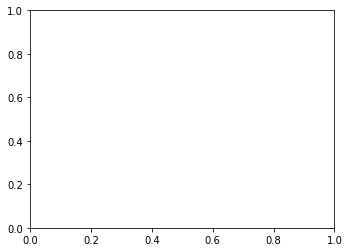

In [ ]:
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
  plt.plot(history.history.get(train_metrics), '-0',color='r')
  plt.plot(history.history.get(val_metrics), '-0',color='b')
  plt.ylabel(train_metrics)
  plt.xlabel('Epochs')
  plt.legend(['train','validation'])
  
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plot_train_history(history, 'loss', 'val_loss')

plt.subplot(1,2,2)
plot_train_history(history, 'accuracy', 'val_accuracy')

plt.show()

In [ ]:
def read_images(path):   # 讀取要測試的資料
  images=[]
  for i in range(10791):
    image=cv2.resize(cv2.imread(path+ str(i+1)+ '.jpg') ,(img_height,img_width))
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 轉換成RGB
    images.append(image)
  images=np.array(images,dtype=np.float32)/255
  return images

model = load_model('model2.h5') # 載入模型
imgsPath ='/content/drive/MyDrive/Machine Learning/theSimpsons-test/test/'
read_test_images = read_images(imgsPath)
predict = model.predict(read_test_images) # 開始預測
predict = np.argmax(predict, axis=1)

In [ ]:
with open('predict2.csv', 'w') as f :  # 存檔成csv，並依照題目要求填入
  f.write('id,character\n')
  for i in range(len(predict)):
    f.write(str(i+1)+ ',' + dict_characters[(predict[i])] + '\n')

In [ ]:
#使用sklearn的分類報告來看預測結果
  
print('\n',sklearn.metrics.classification_report(true,
                        predict,
                        target_names=list(dict_characters.values())), sep='')